### Nota: Revisar libreria https://numpy.org/numpy-financial/latest/

**Laboratorio de Métodos Cuantitativos Aplicados a la Gestión**

---

# **Clase 16 -  📊 Introducción al análisis de inversiones con Python (I)**

---

## Objetivo de la Notebook 🎯📈

Esta notebook tiene como objetivo introducir los conceptos fundamentales del análisis de inversiones utilizando Python. A través de la explicación de fórmulas clave como la equivalencia de tasas, proporción, valor futuro, valor presente y Valor Actual Neto (VAN), así como la aplicación práctica con datos reales (IPC histórico), se busca comprender cómo evaluar la viabilidad y rentabilidad de diferentes proyectos de inversión. Se explorará la distinción entre tasas nominales y efectivas, y se utilizarán herramientas interactivas para facilitar el cálculo y la visualización de los conceptos aprendidos.



---
## Los 3 Motivos de la Demanda de Dinero según Keynes 💸

1. Transacción 🛒
Para pagar gastos diarios (comida, transporte, etc.).

Depende del ingreso: A más ingresos, más dinero se demanda para transacciones.

2. Precaución 🛡️
Para imprevistos (emergencias, gastos inesperados).

También vinculado al nivel de ingresos.

3. Especulativo 📊 (¡El aporte clave de Keynes!)
Demanda por oportunidades de inversión futuras.

    📈Depende de la tasa de interés:

      Si las tasas están bajas, la gente prefiere retener dinero (esperando que suban para invertir en bonos u otros activos) y/o invertir en bienes fisicos, infraestructura, tecnologia, maquinaria, entre otros.

      Si las tasas están altas, prefieren invertir (porque el costo de oportunidad de tener dinero líquido es mayor).

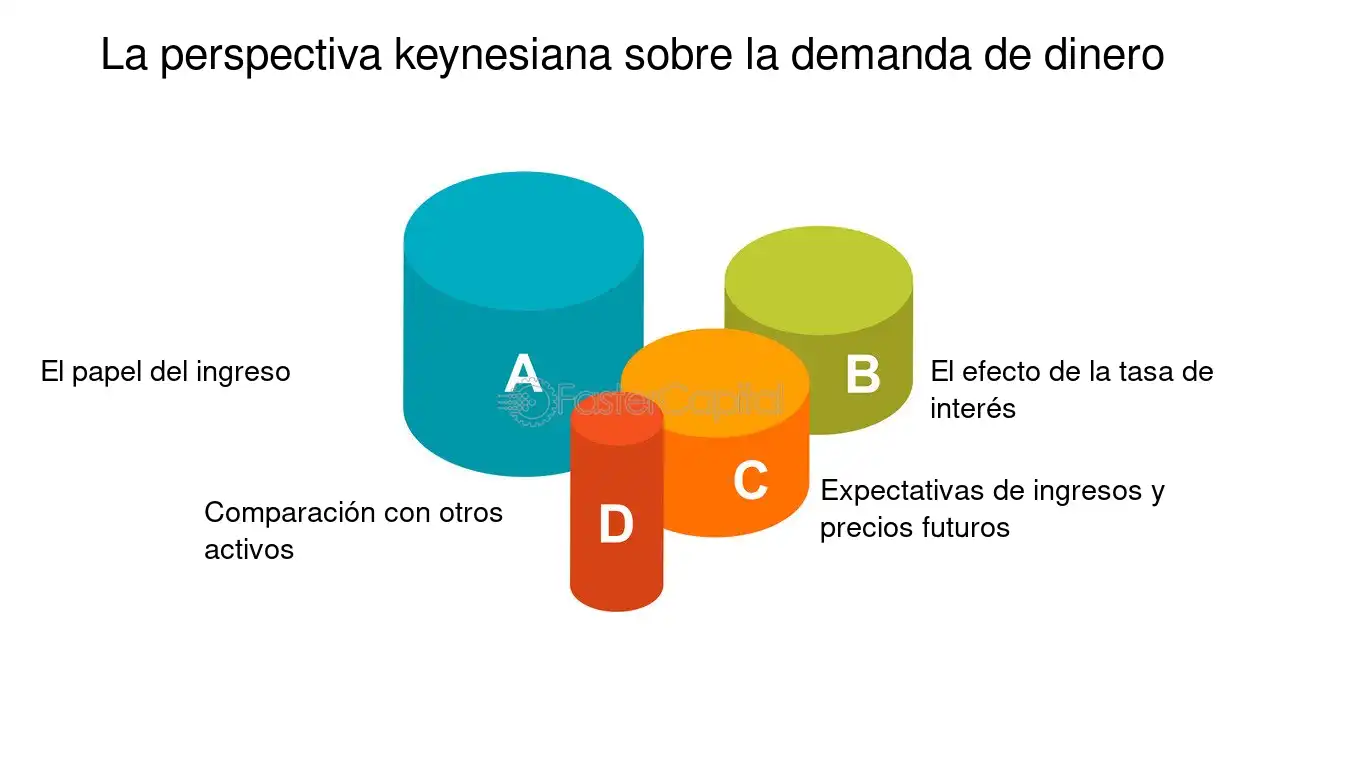


## 💡 ¿Por qué el dinero tiene valor en el tiempo?

Supongamos que tenés $1.000 hoy. ¿Preferís tenerlo hoy o dentro de un año?  
Lo mas racional es si elige hoy. ¿Por qué? Porque:


- Podés invertirlo y ganar intereses.
- Podés gastarlo ahora y satisfacer necesidades o deseos.
- Hay incertidumbre sobre el futuro.

Este principio se conoce como: **Valor del Dinero en el Tiempo**.

🧠PD: Hay gente que aun asi prefiere dentro de un año, principio de economia condutual (Las emociones controlan al ser humano).

---

# 📐 Fórmulas a Utilizar durante el recorrido:




1.   Formula de equivalencia
2.   Formula de proporcion
1.   Valor presente
2.   Valor futuro
1.   Valor actual Neto (VAN)

* Hasta aca la clase de hoy!, el martes la 2da parte 😎


6.   Tasa interna de retorno (TIR)
7.   Tasa interna de retorno modificada (TIRM)
8.   Indice de rentabilidad (IR)
9.   Periodo de recuperacion simple (PRS)
10.   Periodo de recuperacion descontado (PRD)

---


Debemos comenzar distinguiendo la tasa de interes nominal y la tasa de interes efectiva. Esto es con el objetivo de obtener la tasa de nuestra inversion.

* ***Tasa nominal*** = `es una tasa de interés  que no toma en cuenta la frecuencia con la que se capitalizan los intereses `(es decir, si se reinvierten o no). Es decir, la nominal refiere a las normas o presentaciones.

* ***Tasa efectiva*** = `sí considera la capitalización de los intereses y muestra el costo o rendimiento real de un producto financiero en un período determinado, ya sea un préstamo o una inversión`. Es decir, cuanto obtengo de intereses absolutos (es lo que nos interesa.)

---

###***1) Formula de equivalencia***
¿Como pasamos de un periodo a a otro?🧮

La fórmula general para convertir por ejemplo una TEA a TES es:

$$i(t_2) = \left(1 + i(t_1)\right)^{\frac{t_2}{t_1}} - 1$$


### 📌 Donde:
- $it2$ es la **tasa nominal buscada** (en decimales, por ejemplo: 12% = 0.12).
- $t1$ es **el periodo que tengo como dato**
- $t2$ es **el periodo que tengo que buscar**

Pasamos un dato de un periodo y lo pasamos a otro periodo


---







### ***2) Formula de Proporcion***
¿Como pasamos de EFECTIVA a NOMINAL?🧮

La fórmula general para convertir una TN a TE es:

$$
TNA = i_{\text{efectiva, periodo}} \cdot \frac{365}{n}
$$

$$
i_{\text{efectiva, periodo}}  = TNA \cdot \frac{n}{365}
$$

### 📌 Donde:

- $TNA$ → Tasa nominal anual  
- $i_efectiva$ , periodo → Tasa efectiva para un período de \(n\) días  
- $ n $ → Número de días del período de la tasa efectiva

Ojo: si la tasa efectiva del período es compuesta y querés obtener la nominal equivalente, hay que usar equivalencia primero y no solo multiplicar por
365
/
𝑛
365/n.

NO CAPITALIZA!


En caso de querer pasar una nominal anual a efectiva. 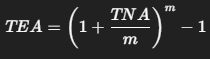

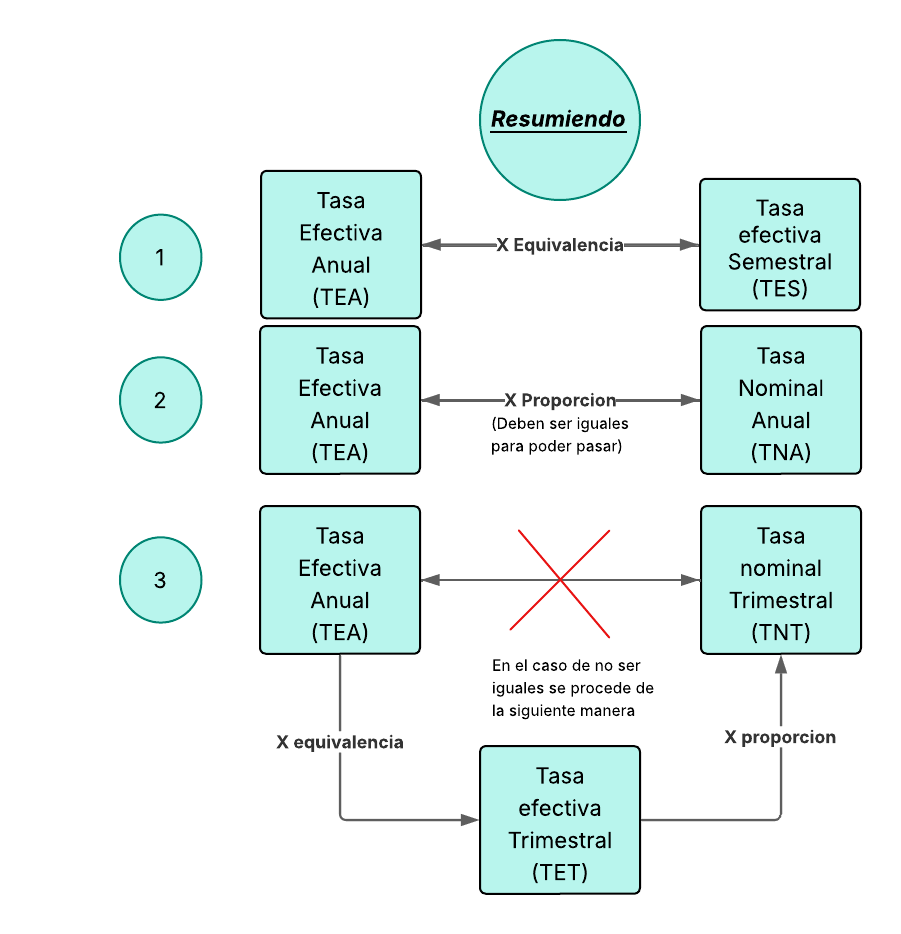

---
## ***3) Valor futuro***

La fórmula:

$$
C_n = C_0 \cdot (1 + i)^n
$$

describe el **régimen de capitalización compuesta**. Es decir, cómo crece una inversión o deuda a lo largo del tiempo cuando los intereses se reinvierten al final de cada período.

### 🔎 Desglose:

- $ C_0 $: capital inicial, es decir, lo que invertís o prestás hoy.
- $ i $: tasa de interés por período (por ejemplo, mensual si capitalizás mensualmente).
- $ n $: número total de períodos (por ejemplo, meses).
- $C_n $: capital final acumulado después de \( n \) períodos, con interés compuesto.

---






## ***4) Valor Presente***

La fórmula:

$$
C_0 = \frac{C_n}{(1 + i)^n}
$$

Es básicamente la inversa del cálculo de valor futuro: en lugar de proyectar cuánto tendrás más adelante, traés un monto futuro a valor de hoy. Esto se llama descontar o actualizar un valor.



### 🔎 Desglose:
- C_0: Capital inicial o valor presente, lo que invertís o prestás hoy.
- C_n: Capital final o valor futuro, monto acumulado al final.
- i: Tasa de interés por período (por ejemplo, mensual si capitalizás mensualmente).
- n: Número total de períodos (meses, años, etc.).

---

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Formulas aplicadas a la vida real ⏰



Comencemos definiendo todas las formulas que hemos visto hasta el momento

In [9]:
# 1) Fórmula de Proporción
def proporcion(TNA, n):
    return TNA * (n / 365)

# 2) Fórmula de Equivalencia
def equivalencia(i_t1, t2, t1):
    return (1 + i_t1) ** (t2 / t1) - 1

# 3) Capitalización Compuesta
def capitalizacion_compuesta(C0, i, n):
    return C0 * (1 + i) ** n

# 4) Valor presente
def valor_presente(Cn, i, n):
    return Cn/((1 + i) ** n )

*  Veamos como podemos hacer una formula de ***proporcion*** con el siguiente
ejemplo: Santander ofrece creditos a una tasa nominal anual de 40%. ¿cuanto seria efectivamente la tasa a los 90 dias?

In [10]:
TNA = 0.40
n_base = 90
SANTANDER=proporcion(TNA, n_base)
print("tasa proporcional nominal a 3 meses:",round(SANTANDER,6)*100)

tasa proporcional nominal a 3 meses: 9.863


In [11]:
Mensual = equivalencia(SANTANDER, 30, 90)
print("Santander ofrece un credito a una tasa efectiva mensual de:",round(Mensual,6)*100)

Santander ofrece un credito a una tasa efectiva mensual de: 3.1851


In [12]:
#Pruebe valores para proporcion TNA TEA (imagen debajo de proporcion)

In [13]:
# idem para equivalencia

In [14]:
#idem capitalizacion compuesta

In [15]:
#idem valor presente

La fórmula de proporcionalidad ignora el efecto del interés compuesto. No considera que los intereses generados en un período más corto (por ejemplo, cada día) se suman al capital y comienzan a generar sus propios intereses. Por lo tanto, la tasa que resulta de esta fórmula no es la tasa real (efectiva) del período.

---

Ahora veamos el siguiente caso el presidente de la nacion, esta haciendo una equivalencia del indice de precios mayoristas, referidos a octubre 2024. analicemos la veracidad de las cuentas.

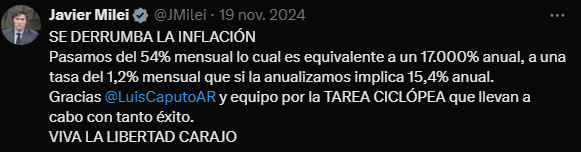

In [16]:
i_2023= 0.54 #interes t1
i_2024= 0.01 #interes t2
dato= 30 #t1
busco= 365 #t2
Resultado1= equivalencia(i_2023,busco,dato) #Consulto a las formulas ya dadas
Resultado2= equivalencia(i_2024,busco,dato) # ""
print("Inflacion anualizada 2023:",(round(Resultado1,6)*100))
print("Inflacion anualizada 2024:",(round(Resultado2,6)*100))


Inflacion anualizada 2023: 19020.6259
Inflacion anualizada 2024: 12.8695


Nuestros numeros dan bastante cerca. Parece que el presidente no esta mintiendo, ahora analicemos el indice de precios al consumidor (IPC).

In [17]:
# from google.colab import drive
# drive.mount('/content/drive')

In [18]:
# Listar el contenido de una carpeta
# !ls "/content/drive/My Drive"

# Buscar un archivo específico por nombre
# !find "/content/drive/My Drive" -name "*.csv"


In [19]:
#cargamos df
ruta = "../../sesiones/integradoras/IPC_Historico(in).csv"
df = pd.read_csv(ruta)

# Ver las primeras filas
df.head()


,Total nacional;Nivel general precios
0,ene-17;1.6
1,feb-17;2.1
2,mar-17;2.4
3,abr-17;2.7
4,may-17;1.4


In [20]:
# Separar columnas
df[['Mes-Año', 'Precio']] = df['Total nacional;Nivel general precios'].str.split(';', expand=True)

# Convertir la columna a num por si las moscas
df['Precio'] = pd.to_numeric(df['Precio'])

# sacamos el año de "Mes-Año"
df['Año'] = df['Mes-Año'].str.split('-').str[1].astype(int)


In [21]:
df_2023 = df[df['Año'] == 23] # Filtrar 2023
df_2024 = df[df['Año'] == 24] # Filtrar 2024

In [22]:
df_2023.head()

,Total nacional;Nivel general precios,Mes-Año,Precio,Año
72,ene-23;6.0,ene-23,6.0,23
73,feb-23;6.6,feb-23,6.6,23
74,mar-23;7.7,mar-23,7.7,23
75,abr-23;8.4,abr-23,8.4,23
76,may-23;7.8,may-23,7.8,23


In [23]:
df_2023.isnull()

,Total nacional;Nivel general precios,Mes-Año,Precio,Año
72,False,False,False,False
73,False,False,False,False
74,False,False,False,False
75,False,False,False,False
76,False,False,False,False
77,False,False,False,False
78,False,False,False,False
79,False,False,False,False
80,False,False,False,False
81,False,False,False,False


tomemos una muestra, octubre 2023

In [24]:
october_2023_data = df_2023[df_2023['Mes-Año'] == 'oct-23']
display(october_2023_data)

,Total nacional;Nivel general precios,Mes-Año,Precio,Año
81,oct-23;8.3,oct-23,8.3,23


aplicamos equivalencia

In [25]:
i_30= 8.3/100
busco1=365
dato1=30
Resultado_1= equivalencia(i_30,busco1,dato1)
print("Inflacion anualizada:",(round(Resultado_1,6)*100))

Inflacion anualizada: 163.8231


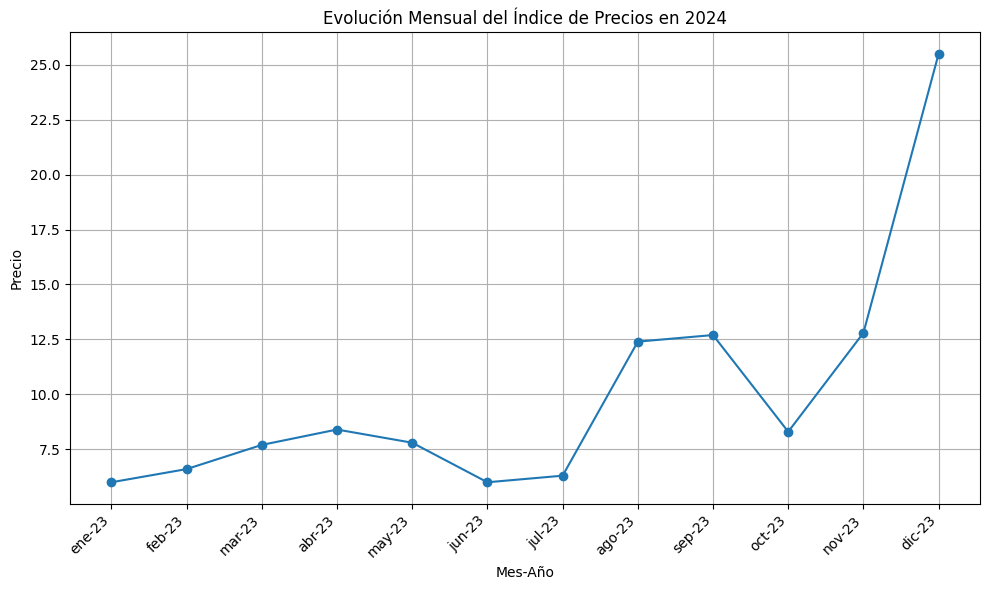

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(df_2023['Mes-Año'], df_2023['Precio'], marker='o', linestyle='-')
plt.xlabel('Mes-Año')
plt.ylabel('Precio')
plt.title('Evolución Mensual del Índice de Precios en 2024')
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Aplicamos la tasa anualizada

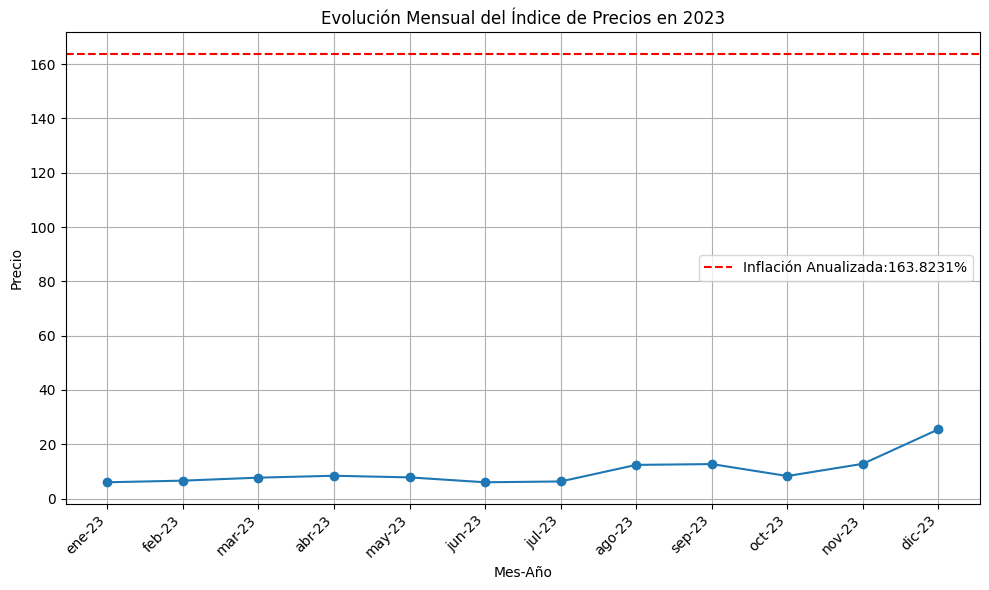

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(df_2023['Mes-Año'], df_2023['Precio'], marker='o', linestyle='-')
plt.axhline(y=(round(Resultado_1,6)*100), color='r', linestyle='--', label='Inflación Anualizada:163.8231%')
plt.xlabel('Mes-Año')
plt.ylabel('Precio')
plt.title('Evolución Mensual del Índice de Precios en 2023')
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [28]:
suma_precios_2023 = df_2023['Precio'].sum()
print(f"Inflacion acumulada para 2023: {suma_precios_2023:.2f}")

Inflacion acumulada para 2023: 120.50


In [29]:
df_2024.head()

,Total nacional;Nivel general precios,Mes-Año,Precio,Año
84,ene-24;20.6,ene-24,20.6,24
85,feb-24;13.2,feb-24,13.2,24
86,mar-24;11.0,mar-24,11.0,24
87,abr-24;8.8,abr-24,8.8,24
88,may-24;4.2,may-24,4.2,24


In [30]:
i_30= 20/100
print("Inflacion acumulada hasta junio", (round(i_30,2)*100))
busco2=365
dato2=30
Resultado_2= equivalencia(i_30,busco2,dato2)
print("Inflacion anualizada:",(round(Resultado_2,6)*100))

Inflacion acumulada hasta junio 20.0
Inflacion anualizada: 819.1191999999999


In [31]:
suma_precios_2024 = df_2024['Precio'].sum()
print(f"Inflacion acumulada para 2024: {suma_precios_2024:.2f}")


Inflacion acumulada para 2024: 81.90


La "moraleja" o lección clave de anualizar la inflación utilizando el enfoque de equivalencia de tasas (como se hizo con la inflación mensual) es que el interés compuesto tiene un impacto significativo a lo largo del tiempo.

Aunque una tasa mensual parezca pequeña, al capitalizarse mes a mes, el efecto acumulado a lo largo de un año es mucho mayor que simplemente multiplicar la tasa mensual por 12 (que sería el enfoque de proporcionalidad).

En el caso de la inflación, esto significa que si la inflación mensual es alta, la inflación anualizada efectiva (que considera el efecto compuesto) será considerablemente mayor que la suma simple de las inflaciones mensuales. Esto es crucial para entender el verdadero poder adquisitivo a lo largo del tiempo y la rentabilidad real de las inversiones.

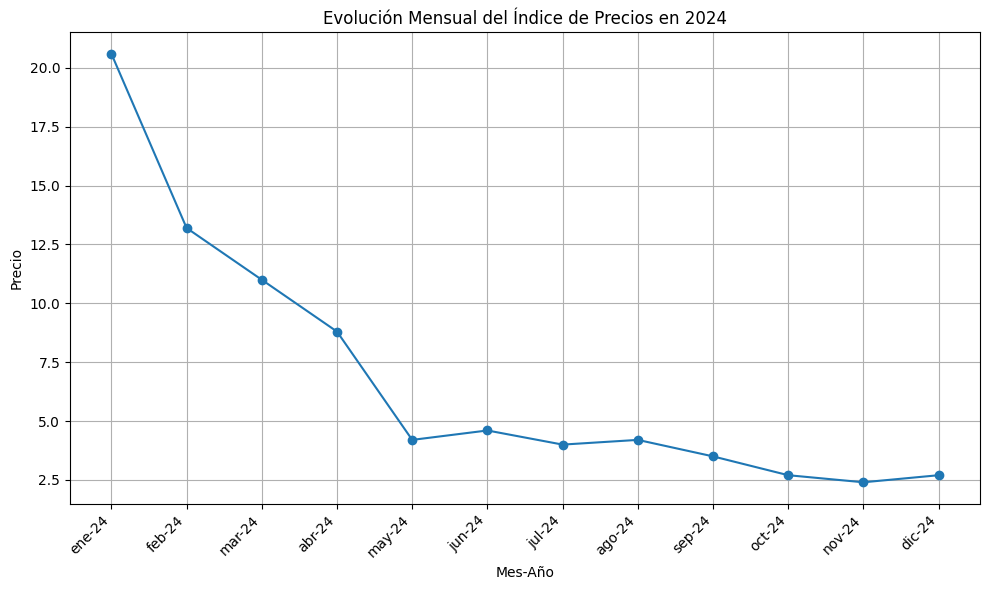

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df_2024['Mes-Año'], df_2024['Precio'], marker='o', linestyle='-')
plt.xlabel('Mes-Año')
plt.ylabel('Precio')
plt.title('Evolución Mensual del Índice de Precios en 2024')
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

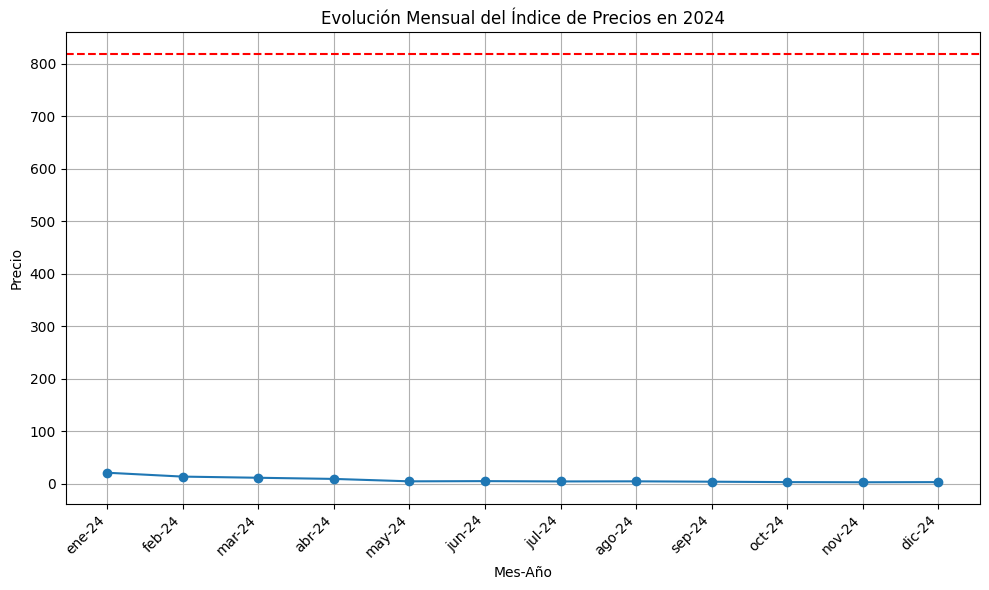

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df_2024['Mes-Año'], df_2024['Precio'], marker='o', linestyle='-')
plt.axhline(y=819.119, color='r', linestyle='--', label='Inflación Anualizada (103.18%)')
plt.xlabel('Mes-Año')
plt.ylabel('Precio')
plt.title('Evolución Mensual del Índice de Precios en 2024')
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

---

Ahora plantemos de manera mas manual lo que vimos hace un ratito

In [34]:
vp = 1000
i = 0.10
n = 3

vf = vp * (1 + i)**n
print(f"El valor futuro de ${vp} en {n} años con una tasa del 10% es: ${vf:.2f}")

El valor futuro de $1000 en 3 años con una tasa del 10% es: $1331.00


In [35]:
#Y el valor presente como seria? resuelva en base a la ecuacion
vp = vf / (1 + i)**n
print(f"El valor presente de ${vf} en {n} años con una tasa del 10% es: ${vp:.2f}")

El valor presente de $1331.0000000000005 en 3 años con una tasa del 10% es: $1000.00


Veamos un ejemplo consolidado ahora

In [36]:
# EJEMPLO
TNA = 0.36      # Tasa Nominal Anual (36%)
n_base = 30     # días base para la proporcionalidad
t2 = 90         # queremos la tasa a 90 días
capital_inicial = 1000

# Paso 1: de TNA a efectiva de 30 días
i_30 = proporcion(TNA, n_base)

# Paso 2: de efectiva 30 días a efectiva 90 días
i_90 = equivalencia(i_30, t2, n_base)

# Paso 3: capitalización compuesta usando la tasa de 90 días
capital_final = capitalizacion_compuesta(capital_inicial, i_90, 1)  # un período de 90 días

print("Tasa efectiva 30 días:", round(i_30, 6)*100)
print("Tasa efectiva 90 días:", round(i_90, 6)*100)
print("Capital final en 90 días:", round(capital_final, 2))



Tasa efectiva 30 días: 2.9589
Tasa efectiva 90 días: 9.142
Capital final en 90 días: 1091.42


Datos iniciales

* TEA = 43%

* n_base = 12 Meses

* t2 = 6 meses

* Capital inicial = 100K

Recuerden pasar a unidades tradicionales en nuestro analisis!

In [37]:
#intente aqui

---

## 5) Valor Actual Neto (VAN)

El Valor Actual Neto (VAN) es uno de los indicadores más importantes para evaluar la viabilidad económica de un proyecto de inversión. `Se calcula trayendo a valor presente todos los flujos de caja futuros esperados del proyecto y restándole la inversión inicial.`

La fórmula general del VAN es:

$$
VAN = \sum_{t=0}^{n} \frac{F_t}{(1+r)^t} - I_0
$$

Donde:

- $ VAN $: Valor Actual Neto
- $ F_t $: Flujo de caja en el período \( t \)
- $ r $: Tasa de descuento o tasa de rendimiento requerida (costo de capital)
- $ t $: Período de tiempo
- $ n $: Número total de períodos
- $ I_0 $: Inversión inicial (que generalmente se representa como un flujo de caja negativo en el período 0)

**Interpretación del VAN:**

- Si **VAN > 0**: El proyecto es rentable y se espera que genere valor por encima de la tasa de rendimiento requerida. Conviene aceptar el proyecto.
- Si **VAN < 0**: El proyecto no es rentable y se espera que destruya valor. No conviene aceptar el proyecto.
- Si **VAN = 0**: El proyecto es indiferente. Genera exactamente la tasa de rendimiento requerida, pero no crea valor adicional.


# ¿Cual es la diferencia con el valor presente?

* El valor presente (VP) es el valor actual de uno o varios flujos futuros descontados a una tasa determinada, mientras que el valor actual neto (VAN) es ese valor presente total menos la inversión inicial. En otras palabras, el VP te dice cuánto valen hoy los flujos futuros, y el VAN te indica si el proyecto crea o destruye valor

---

Ahora, veamos un ejemplo práctico en código.

In [38]:
#lista
flujos_caja = {
    'Año': [0, 1, 2, 3, 4, 5],
    'Flujo': [-10000, 3000, 3500, 4000, 4000, 2000]
}

# Creo df
df_flujos = pd.DataFrame(flujos_caja)

df_flujos


,Año,Flujo
0,0,-10000
1,1,3000
2,2,3500
3,3,4000
4,4,4000
5,5,2000


In [39]:
# Definir la tasa de descuento para ver cuanto saca periodo a periodo
tasa_descuento = 0.12

# valor presente
df_flujos['Valor Presente'] = df_flujos['Flujo'] / (1 + tasa_descuento) ** df_flujos['Año'] # por cada flujo lo descuenta por una tasa de interes

# Calcular el VAN sumando los valores presentes de todos los flujos
van_calculado = df_flujos['Valor Presente'].sum()

# Mostrar el DataFrame con los valores presentes
print("Tabla de Flujos de Caja y sus Valores Presentes:")
display(df_flujos)

# Mostrar el resultado del VAN
print(f"\nEl Valor Actual Neto (VAN) del proyecto es: ${van_calculado:.2f}")

Tabla de Flujos de Caja y sus Valores Presentes:


,Año,Flujo,Valor Presente
0,0,-10000,-10000.000000
1,1,3000,2678.571429
2,2,3500,2790.178571
3,3,4000,2847.120991
4,4,4000,2542.072314
5,5,2000,1134.853711



El Valor Actual Neto (VAN) del proyecto es: $1992.80


In [40]:
# Interpretar el resultado del VAN
if van_calculado > 0:
    print("Interpretación: El VAN es positivo, por lo tanto, el proyecto es rentable y conviene aceptarlo.")
elif van_calculado < 0:
    print("Interpretación: El VAN es negativo, por lo tanto, el proyecto no es rentable y no conviene aceptarlo.")
else:
    print("Interpretación: El VAN es cero, el proyecto es indiferente.")

Interpretación: El VAN es positivo, por lo tanto, el proyecto es rentable y conviene aceptarlo.


generar una formula para que se aplique para otros casos y despues hacer un ejemplo con un slide

In [41]:
#Guardemos una funcion donde calcule VPN
def calcular_vpn(flujos, tasa):
    ##Formula que calcula VPN, toma un array y una tasa la cual debemos definir con ese mismo nombre)##

    df = pd.DataFrame(flujos)
    df['VP'] = df['Flujo'] / (1 + tasa) ** df['Año']
    vpn = df['VP'].sum()
    return df, vpn

In [42]:
# Inputs del usuario
# Usar inputs manuales si se desea

# Flujos predefinidos por ahora
flujos = {
    'Año': [0, 1, 2, 3, 4],
    'Flujo': [-5000, 1500, 2000, 2000, 1000]
}
tasa = 0.1

df, vpn = calcular_vpn(flujos, tasa)
print(df)
print(f"\n📌 Valor Presente Neto del proyecto: ${vpn:.2f}")

   Año  Flujo           VP
0    0  -5000 -5000.000000
1    1   1500  1363.636364
2    2   2000  1652.892562
3    3   2000  1502.629602
4    4   1000   683.013455

📌 Valor Presente Neto del proyecto: $202.17


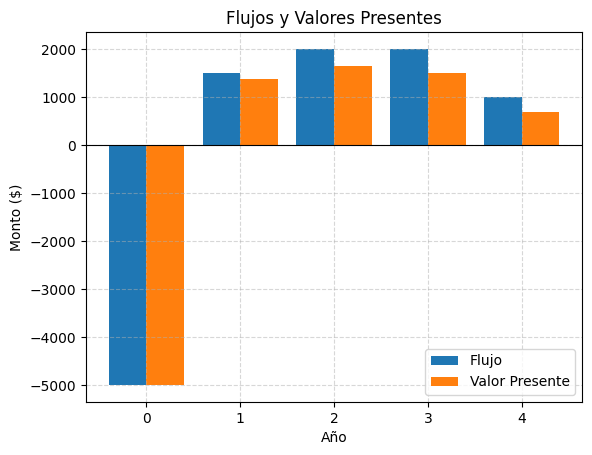

In [43]:
plt.bar(df['Año'] - 0.2, df['Flujo'], width=0.4, label='Flujo', align='center')
plt.bar(df['Año'] + 0.2, df['VP'], width=0.4, label='Valor Presente', align='center')
plt.xlabel('Año')
plt.ylabel('Monto ($)')
plt.title('Flujos y Valores Presentes')
plt.axhline(0, color='black', linewidth=0.8)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

---

Ahora generemos un ejemplo para que ustedes calculen tasas en la vida real poniendo determinados valores, para ello arrancamos

In [50]:
%pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [51]:
#Librerias que nos permiten interactuar
import ipywidgets as widgets
from IPython.display import display, clear_output

In [52]:
# Sliders para tasa y años

tasa_slider = widgets.FloatSlider(
    value=0.1,
    min=0.01,
    max=0.5,
    step=0.01,
    description='Tasa:',
    readout_format='.2%',
    continuous_update=False
)

anios_slider = widgets.IntSlider(
    value=4,
    min=1,
    max=10,
    step=1,
    description='Años:',
    continuous_update=False
)

In [53]:
def interfaz_vpn(tasa, anios):
    np.random.seed(42) # seteamos una semilla aleatoria
    flujos = [-5000] + list(np.random.randint(800, 2500, size=anios)) #hacemos un flujo de dinero que comience negativo producto de la inversion inicial y que luego vaya asignando de manera aleatoria valores entre 800 & 2500
    años = list(range(anios + 1)) # aramar años-flujo en funcion del rango que tome el tome el slider

    datos = {'Año': años, 'Flujo': flujos}
    df, vpn = calcular_vpn(datos, tasa) #VPN

    clear_output(wait=True)
    display(tasa_slider, anios_slider)

    print(f"\n📌 Valor Presente Neto (VPN): ${vpn:.2f}")
    print(df)


    plt.bar(df['Año'] - 0.2, df['Flujo'], width=0.4, label='Flujo', align='center') #PLOT
    plt.bar(df['Año'] + 0.2, df['VP'], width=0.4, label='Valor Presente', align='center')
    plt.xlabel('Año')
    plt.ylabel('Monto ($)')
    plt.title('Flujos y Valores Presentes')
    plt.axhline(0, color='black', linewidth=0.8)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

widgets.interact(interfaz_vpn, tasa=tasa_slider, anios=anios_slider);

interactive(children=(FloatSlider(value=0.1, continuous_update=False, description='Tasa:', max=0.5, min=0.01, …

In [54]:
import pandas as pd
from ipywidgets import interact, FloatSlider, Dropdown, Output, VBox, HBox
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

# --- Función de conversión TNA → TEA ---
def convertir_tna_a_tea(TNA, m=12):
    """
    Convierte TNA en TEA según la base de capitalización m.
    TNA: tasa nominal anual (%)
    m: períodos de capitalización al año (ej: 12 = mensual, 4 = trimestral, 365 = diaria)
    """
    TNA_decimal = TNA / 100
    TEA = (1 + TNA_decimal/m)**m - 1
    return TEA

# --- Función para calcular VAN ---
def calcular_van(df, TEA):
    df['año'] = pd.to_numeric(df['año'])
    df['flujo'] = pd.to_numeric(df['flujo'])
    VAN = sum([flujo / ((1 + TEA)**año) for año, flujo in zip(df['año'], df['flujo'])])
    return VAN

# Variable global para guardar DataFrame
flujos_df_global = None

# Widgets
output_widget = Output()
TNA_slider_widget = FloatSlider(min=0, max=200, step=1, value=20, description="TNA (%)")
base_dropdown = Dropdown(options={'Mensual (12)': 12, 'Trimestral (4)': 4, 'Diaria (365)': 365},
                         value=12, description="Base:")

# --- Función interactiva ---
def update_van_display(TNA, base):
    with output_widget:
        clear_output(wait=True)
        if flujos_df_global is not None:
            # Convertir TNA → TEA según base
            TEA = convertir_tna_a_tea(TNA, base)

            # Calcular VAN
            van = calcular_van(flujos_df_global, TEA)

            # Calcular valor presente de cada flujo
            df_display = flujos_df_global.copy()
            df_display['valor_presente'] = df_display['flujo'] / (1 + TEA) ** df_display['año']

            print("📊 Flujos cargados con Valor Presente:")
            display(df_display)

            print(f"\nTNA: {TNA:.2f}% (base {base}) → TEA: {TEA*100:.2f}%")
            print(f"VAN calculado: {van:.2f}")

            if van > 0:
                print("✅ El VAN es positivo → el proyecto es rentable.")
            elif van < 0:
                print("❌ El VAN es negativo → el proyecto no es rentable.")
            else:
                print("⚖️ El VAN es cero → el proyecto es indiferente.")

            # Graficar
            plt.figure(figsize=(10, 6))
            plt.bar(df_display['año'] - 0.2, df_display['flujo'], width=0.4, label='Flujo')
            plt.bar(df_display['año'] + 0.2, df_display['valor_presente'], width=0.4, label='Valor Presente')
            plt.xlabel('Año')
            plt.ylabel('Monto ($)')
            plt.title('Flujos de Caja y Valores Presentes')
            plt.axhline(0, color='black', linewidth=0.8)
            plt.legend()
            plt.grid(True, linestyle='--', alpha=0.5)
            plt.show()
        else:
            print("Por favor, sube un archivo de flujos de caja primero.")

# Display UI
print("👉 Ajusta la TNA y la base de capitalización, luego sube tu archivo de flujos:")
display(VBox([HBox([TNA_slider_widget, base_dropdown]), output_widget]))

# --- Subida de archivo ---
print("\n📂 Subí tu archivo CSV o Excel con las columnas: Año, Flujo")
uploaded = files.upload()

for fn in uploaded.keys():
    try:
        if fn.endswith(".csv"):
            flujos_df_global = pd.read_csv(fn)
        elif fn.endswith((".xlsx", ".xls")):
            flujos_df_global = pd.read_excel(fn)

        # Normalizar nombres de columnas
        flujos_df_global.columns = flujos_df_global.columns.str.strip().str.lower()

        print("✅ Archivo cargado correctamente. Columnas:", flujos_df_global.columns)

        # Ejecutar con valores iniciales
        update_van_display(TNA_slider_widget.value, base_dropdown.value)

        # Enlazar widgets a función
        interact(update_van_display, TNA=TNA_slider_widget, base=base_dropdown)

    except Exception as e:
        with output_widget:
            clear_output(wait=True)
            print(f"❌ Error al cargar el archivo: {e}")
            flujos_df_global = None



👉 Ajusta la TNA y la base de capitalización, luego sube tu archivo de flujos:



📂 Subí tu archivo CSV o Excel con las columnas: Año, Flujo


NameError: name 'files' is not defined

In [55]:
#@title Easter egg 🥚
from IPython.display import Image
Image(url='https://media4.giphy.com/media/v1.Y2lkPTc5MGI3NjExd2l6MHdrNWl5YTJtMmt0ZXVrb3l5MnFkMnE3ZTA1bDl1cmtjMjUzYSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/YnkMcHgNIMW4Yfmjxr/giphy.gif')

# Ejercicios

### Ejercicio 1: Anualizar

*  Veamos el siguiente ejemplo para la formula de ***equivalencia***: Aqui debajo vemos los datos interanuales de la inflacion en Argentina. En base a la inflacion que tuvimos hasta la mitad del año. ¿Cuanto seria la anualizada? (Parta de una tasa efectiva semestral)

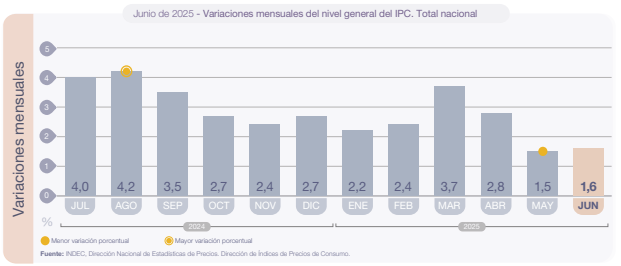

### Ejercicio 2: Proporción

Tienes un capital de $1000 que quieres invertir. Un banco te ofrece una Tasa Nominal Anual (TNA) del 48% con capitalización mensual.

1.  Calcula la Tasa Efectiva Mensual (TEM)
2.  Calcula la Tasa Efectiva Anual (TEA)


### Ejercicio 3: Valor Actual Neto (VAN)

Una empresa está evaluando un proyecto de inversión que requiere una inversión inicial de $50,000 en el Año 0. Se esperan los siguientes flujos de caja en los próximos 4 años:

*   Año 1: $15,000

*   Año 2: $20,000

*   Año 3: $25,000

*   Año 4: $10,000

Si la tasa de descuento requerida (costo de capital) es del 10% anual, calcula el Valor Actual Neto (VAN) del proyecto e interpreta si el proyecto es rentable.

### Ejercicio 4: Aplicacion a Obligacion Negociable.

Observa la imagen que muestra una Tasa Nominal Anual (TNA) y un capital.

Utilizando las fórmulas de equivalencia y/o proporción (según corresponda y las suposiciones que hagas sobre la capitalización de la TNA) Y la formula de valor futuro para verificar cuanto ganariamos por mes de invertir un monto de 100 USD. Y con 1000 USD?


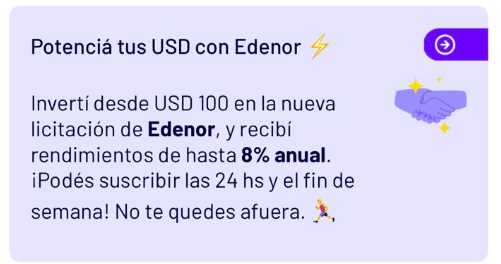

---